## Pandas Recap

What we learned last week:
- `pandas.Series`: Column in a DataFrame
- `pandas.DataFrame`: Collection of columns
- Reading a DataFrame from a .csv
- Accessing values, columns, summaries
- Sorting & Plotting

## This week's topics
- More on summery and selecting
- Grouping
- Apply
- Aggregation
- Transforming columns

In [1]:
# Render our plots inline
%matplotlib inline

#import the pandas library and aliasing as pd
import pandas as pd

#import the matplotlib library and aliasing as plt
import matplotlib.pyplot as plt

#import the numpy library and aliasing as np
import numpy as np



In [2]:
# Import a table
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')


In [3]:
# look into the data frame
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [4]:
# get the info of the data frame
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [5]:
# check the data types
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [6]:
# check the shape of the data frame
users.shape

(943, 4)

In [7]:
# take the column names
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [8]:
# select 'age' column  using . notation
users.age

user_id
1      24
2      53
3      23
4      24
5      33
6      42
7      57
8      36
9      29
10     53
11     39
12     28
13     47
14     45
15     49
16     21
17     30
18     35
19     40
20     42
21     26
22     25
23     30
24     21
25     39
26     49
27     40
28     32
29     41
30      7
       ..
914    44
915    50
916    27
917    22
918    40
919    25
920    30
921    20
922    29
923    21
924    29
925    18
926    49
927    23
928    21
929    44
930    28
931    60
932    58
933    28
934    61
935    42
936    24
937    48
938    38
939    26
940    32
941    20
942    48
943    22
Name: age, Length: 943, dtype: int64

In [9]:
# select 'occupation' column using [] notation 
users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

In [10]:
# get the unique number of occupations
users.occupation.nunique()

21

In [11]:
# count the number of each occupation and return then in a increasing order
users.occupation.value_counts(ascending=True)

doctor             7
homemaker          7
none               9
lawyer            12
salesman          12
retired           14
healthcare        16
entertainment     18
marketing         26
technician        27
artist            28
scientist         31
executive         32
writer            45
librarian         51
programmer        66
engineer          67
administrator     79
educator          95
other            105
student          196
Name: occupation, dtype: int64

In [12]:
#select the rows between 5 and 10
users[5:10]

,age,gender,occupation,zip_code
user_id,,,,
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002
10,53,M,lawyer,90703


In [13]:
# select the occupation of the users in rows between 5 and 10
users.occupation[5:10]

user_id
6         executive
7     administrator
8     administrator
9           student
10           lawyer
Name: occupation, dtype: object

In [14]:
# select the occupation and age of the users in rows between 5 and 10
users[['occupation','age']][5:10]

,occupation,age
user_id,,
6,executive,42
7,administrator,57
8,administrator,36
9,student,29
10,lawyer,53


In [15]:
# count the number of female/male users
users.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [16]:
# print the average , min, max age of the users
print('average age:',users.age.mean())
print('min age:',users.age.min())
print('max age:',users.age.max())

average age: 34.05196182396607
min age: 7
max age: 73


In [17]:
# do the above task in a more elegant way
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


### Grouping
We can gain additional insight by grouping our data.

In [18]:
# get the number of female/male users using groupby function
users.groupby(by='gender').size()

gender
F    273
M    670
dtype: int64

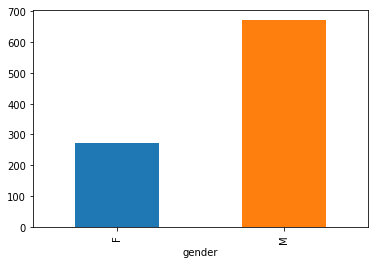

In [19]:
# plot the female/male users using bar chart
users.groupby(by='gender').size().plot.bar()

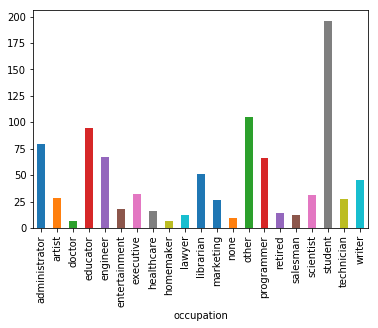

In [20]:
# plot the frequency of each occupation using bar chart
users.groupby('occupation').size().plot.bar()


In [21]:
# get the average age for each occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [22]:
# get the average age per occupation and gender
users.groupby(['occupation','gender']).mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

## Applying functions

In [36]:
# create a function that encode the gender column
def gender2numeric(X):
    if X == 'M':
        return 0
    if X == 'F':
        return 1

# apply the function to the gender column and create a new column named 'gender_n'
users['gender_count']=users.gender.apply(gender2numeric)

# get the male percentage per occupation

a=users.groupby('occupation').gender_count.sum()/users.occupation.value_counts() * 100 
# sort to the most male 
a.sort_values()

doctor            0.000000
engineer          2.985075
technician        3.703704
retired           7.142857
programmer        9.090909
executive         9.375000
scientist         9.677419
entertainment    11.111111
lawyer           16.666667
salesman         25.000000
educator         27.368421
student          30.612245
other            34.285714
marketing        38.461538
writer           42.222222
none             44.444444
administrator    45.569620
artist           46.428571
librarian        56.862745
healthcare       68.750000
homemaker        85.714286
dtype: float64

In [28]:
# check what changed in the data frame
users

,age,gender,occupation,zip_code,gender_count
user_id,,,,,
1,24,M,technician,85711,0
2,53,F,other,94043,1
3,23,M,writer,32067,0
4,24,M,technician,43537,0
5,33,F,other,15213,1
6,42,M,executive,98101,0
7,57,M,administrator,91344,0
8,36,M,administrator,05201,0
9,29,M,student,01002,0


## Aggregation

In [38]:
# Compute the minimum and maximum age

In [39]:
# create a data frame and apply count to gender per occupation


In [40]:
# create a DataFrame and apply count for each occupation


In [41]:
# divide the gender_ocup per the occup_count and multiply by 100


In [42]:
# present all rows from the 'gender column' of the data frame in above cell


## Adding and changing variables

In [43]:
# check the shape of users data set


In [44]:
# create a series to add to useres data frame as new column


In [45]:
# add the series to the users data frame under the column "newColumn1"


## Merging Data

In [47]:
# create a data frame  with columne names "newColumn2" and "newColumn3" to merge with useres data frame 


In [48]:
# merge the useres data frame with the new data frame
